Regression analysis of the US housing price index
=================================================

This notebook demonstrates how linear regression can be used to understand how the US housing price index (a measure of sales prices of homes in the United States) is related to several factors that may be associated with it.  These factors are: the per-capita disposable income (total income minus taxes), the population growth rate, and the real cost of borrowing.

The units of analysis are "metropolitan statistical areas" (MSAs), see [here](http://en.wikipedia.org/wiki/Metropolitan_statistical_area) for more information.  Each MSA has data for each year from 1976 to 2011.

This is a longitudinal (panel) data set, since the data consist of repeated measures over time on the units of analysis (MSAs).  Since our goal here is to demonstrate basic regression techniques, we will fit models to data from a single year, so that we do not need to use more complex regression methods for repeated measures data.

The data are available for download [here](http://qed.econ.queensu.ca/jae/datasets/baltagi005).  We will use the file "msa_4v.txt" in this analysis.  See the README file [here](http://qed.econ.queensu.ca/jae/datasets/baltagi005/readme.bl.txt) for a description of the data.

__Note:__ there is a problem with the data file that must be fixed manually before running the code below.  The first line (header line) of the file contains an extra tab between "pgr" and "rcb".  Remove one tab before proceeding.

We always begin by importing the libraries that we will use in the analysis.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.predict_functional import predict_functional

__Setting up the data__

Next we read in the data file.  The fields in the file are delimited by tabs, but the default delimiter for `read_csv` is a comma, so we specify the delimiter explicitly using a keyword argument.

In [2]:
data = pd.read_csv("msa_4v.txt", delimiter="\t")

We can take a peek at the top few lines of the data set to make sure we know what we are getting:

In [3]:
print(data.head())

   msa_cd  year  lhpi_real  lpci_real       pgr       rcb
0   10180  1976   4.844059   2.201513  0.017761  0.042508
1   10180  1977   4.815117   2.221950 -0.002455  0.031205
2   10180  1978   4.768689   2.262859  0.010542  0.035790
3   10180  1979   4.687458   2.260116  0.015783  0.047794
4   10180  1980   4.605170   2.267994  0.025278  0.072353


Next we check the data types.  If something that is supposed to be numeric shows up with an `Object` data type, we would need to convert it explicitly using `convert_objects`.  Fortunately, all the variables were automatically converted to numeric types, so manual conversion is not necessary here.

In [4]:
print(data.dtypes)

msa_cd         int64
year           int64
lhpi_real    float64
lpci_real    float64
pgr          float64
rcb          float64
dtype: object


Next we check to see whether there are any missing values (there aren't any):

In [5]:
print(pd.isnull(data).sum())

msa_cd       0
year         0
lhpi_real    0
lpci_real    0
pgr          0
rcb          0
dtype: int64


__Some simple non-regression analyses__

Although we will only be looking at data from a single year, it is useful to see how the data look as a time series.  Next we plot the mean housing price index and the mean disposable income level as a function of time.

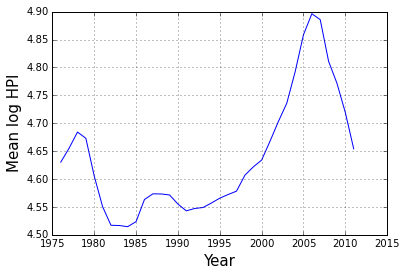

In [6]:
lhpi_mean = data.groupby("year").agg(np.mean)
plt.plot(lhpi_mean.index, lhpi_mean.lhpi_real, '-')
plt.grid(True)
plt.xlabel("Year", size=15)
plt.ylabel("Mean log HPI", size=15)

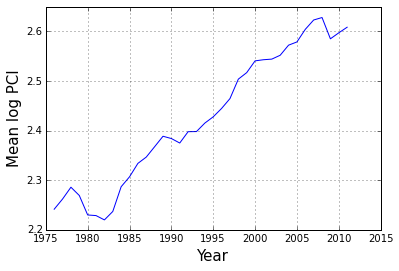

In [7]:
lpci_mean = data.groupby("year").agg(np.mean)
plt.plot(lpci_mean.index, lpci_mean.lpci_real, '-')
plt.grid(True)
plt.xlabel("Year", size=15)
plt.ylabel("Mean log PCI", size=15)

Now we create a subset containing only the data from 1990:

In [8]:
ii = (data.year == 1990)
data_1990 = data.loc[ii, :]
print(data_1990.shape)

(381, 6)


It's useful to have some simple summary statistics of the variables in the data set:

In [9]:
print(data_1990.describe().T)

           count          mean           std           min           25%  \
msa_cd       381  29899.989501  11341.568547  10180.000000  19804.000000   
year         381   1990.000000      0.000000   1990.000000   1990.000000   
lhpi_real    381      4.555117      0.186258      3.963379      4.451201   
lpci_real    381      2.383997      0.175830      1.817481      2.274855   
pgr          381      0.013187      0.017628     -0.018828      0.001731   
rcb          381      0.048540      0.048847     -0.154425      0.033854   

                    50%           75%           max  
msa_cd     29740.000000  39740.000000  49740.000000  
year        1990.000000   1990.000000   1990.000000  
lhpi_real      4.521638      4.626211      5.287331  
lpci_real      2.375718      2.484928      2.994031  
pgr            0.009687      0.018305      0.133832  
rcb            0.052118      0.071413      0.273101  


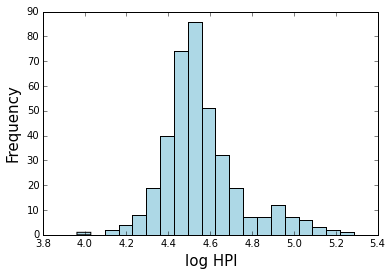

In [10]:
_ = plt.hist(data_1990.lhpi_real.values, color='lightblue', bins=20)
plt.xlabel('log HPI', size=15)
plt.ylabel('Frequency', size=15)

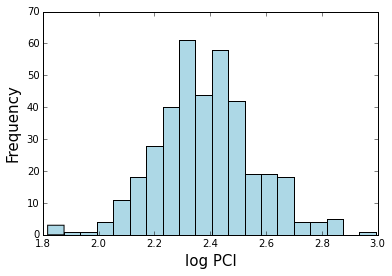

In [11]:
_ = plt.hist(data_1990.lpci_real.values, color='lightblue', bins=20)
plt.xlabel('log PCI', size=15)
plt.ylabel('Frequency', size=15)

__Fitting a simple linear regression model__

A "simple linear regression model" is a linear regression model with a single covariate.  We will start with a simple linear regression model in which the log housing price index is predicted by the log per-capita disposable income. 

In [12]:
model0 = sm.OLS.from_formula("lhpi_real ~ lpci_real", data_1990)
result0 = model0.fit()

Usually it is more convenient to fit a model using formulas, but sometimes it's easier to just pass the data as arrays, like here:

In [13]:
model0_alt = sm.OLS(data.lhpi_real, data.lpci_real)
result0_alt = model0_alt.fit()

Here is what the model tells us:

In [14]:
print(result0.summary())

                            OLS Regression Results                            
Dep. Variable:              lhpi_real   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     74.69
Date:                Thu, 11 Jun 2015   Prob (F-statistic):           1.57e-16
Time:                        13:26:04   Log-Likelihood:                 134.47
No. Observations:                 381   AIC:                            -264.9
Df Residuals:                     379   BIC:                            -257.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.5305      0.119     29.697      0.0

A simple linear regression model describes the relationship between two variables.  Since the variables are quantitative, we can easily visualize the regression relationship as a scatterplot.

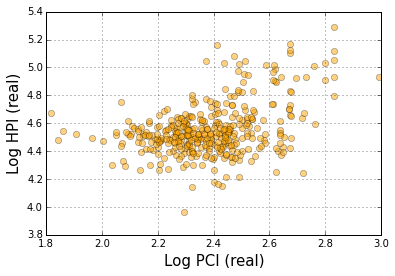

In [15]:
plt.plot(data_1990.lpci_real, data_1990.lhpi_real, 'o', color='orange', alpha=0.5)
plt.grid(True)
plt.xlabel("Log PCI (real)", size=15)
plt.ylabel("Log HPI (real)", size=15)

The strength of the linear relationship is given by the R^2 (see table above).  In the case of simple linear regression, the R^2 is identical to the square of the Pearson correlation coefficient between the independent and dependent variables in the regression.

In [16]:
cmat = np.corrcoef(data_1990.lpci_real, data_1990.lhpi_real)
print(cmat)
print(cmat[0,1]**2)

[[ 1.          0.40573422]
 [ 0.40573422  1.        ]]
0.164620254229


Since both the housing price index and the disposable income are log transformed, the relationship between them is interpreted in "log/log" form.  This means that for a fixed percentage change in disposable income, there is a fixed percentage change in the housing price index.

__Scatterplot smoothing__

Smoothing is a form of regression analysis (conditional mean estimation) that can be useful when there are only a few (or only one) predictor variables.  Next we use the `lowess` smoothing function to relate the housing price index and disposable income data.  

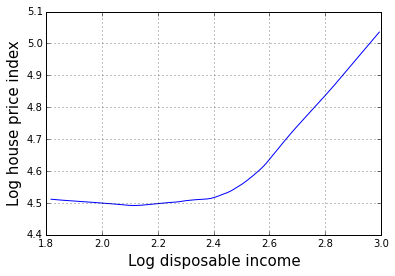

In [17]:
smooth = sm.nonparametric.lowess(data_1990.lhpi_real, data_1990.lpci_real)
plt.plot(smooth[:,0], smooth[:,1])
plt.grid(True)
plt.xlabel("Log disposable income", size=15)
plt.ylabel("Log house price index", size=15)

The plot above indicates that for MSAs with log disposable income from around 1.8 to around 2.4, the log housing price index is roughly constant at around 4.5.  When the log disposable income is higher then 2.4, there is a strong positive association between disposable income and housing prices.

__Getting help__

If you want to access the documentation for any function within the IPython notebook, use `?`, for example: `?sm.nonparametric.lowess`. It is helpful in this case because it is hard to remember that the statistical models take `y` (`endog`) as the first argument and `x` (`exog`) as the second argument, but the plotting functions take the variable to be plotted on the horizontal axis (`x`) as the first argument and the variable to be plotted on the vertical axis (`y`) as the second argument.  Since the output of `lowess` is usually plotted, the return value of `lowess` follows the plotting convention (`x` in the first column, `y` in the second column).

If you are confused about what type of value a variable holds, you can use the `type` function to get its type, and the `dir` function to get all its attributes.  Attributes beginning and ending with `__` are private and are not intended to be used outside the library itself

In [18]:
print(type(smooth))
print(dir(smooth))

<class 'numpy.ndarray'>
['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imod__', '__imul__', '__index__', '__init__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__rpow__', '__rrshift__', '__rshift__', '_

__Fitting a basic multiple regression model__

Next we fit a multiple linear regression model relating the housing price index to disposable income, population growth rate, and cost of borrowing.  A multiple linear regression model is a linear regression model in which several predictors (independent variables) predict a single outcome variable.  The formula specifies an additive mean structure with no interactions or transformations (we'll look at other types of mean structure below).

In [19]:
model1 = sm.OLS.from_formula("lhpi_real ~ lpci_real + pgr + rcb", data_1990)
result1 = model1.fit()

Here is what the model tells us:

In [20]:
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:              lhpi_real   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     27.91
Date:                Thu, 11 Jun 2015   Prob (F-statistic):           2.55e-16
Time:                        13:26:06   Log-Likelihood:                 138.41
No. Observations:                 381   AIC:                            -268.8
Df Residuals:                     377   BIC:                            -253.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.5073      0.118     29.614      0.0

__Interpretation of the basic multiple regression model__

The simplistic interpretation of this fit is that in MSAs where people have higher disposable incomes, and/or where the population is increasing, housing prices are higher (compared to MSAs where the disposable income and/or population are flat or declining).  There is no obvious association between the housing price index and the cost of borrowing (`rcb`).

* As in all multiple regression models, the interpretation of each regression coefficient is the average difference in the dependent variable (`lhi_real` in this model) when comparing two observations whose values for the independent variable (`lpci_real`) differ by one unit, while holding the values of the other covariates fixed.

* Since this is an observational data set, the covariate effects reflect associations that should be presumed to be non-causal.

We might wonder if there is much variation in the cost of borrowing (`rcb`) within one year.  If this variable is nearly constant, then it would be surprising to see an association between the dependent variable and `rcb`. but it seems that there is almost as much variation in the `rcb` within years as between years.

In [21]:
print(data.rcb.std())
print(data_1990.rcb.std())

0.0619735827435
0.0488467035259


The regression coefficient for `lpci_real` is almost identical in the simple and multiple regression models.  This will always be the case when `lpci_real` is uncorrelated with the other variables in the model.  We can check the relationship between `lpci_real` and `pgr` with a scatterplot.

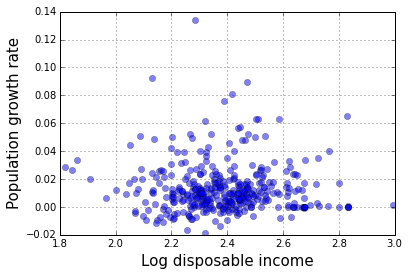

In [22]:
plt.plot(data_1990.lpci_real, data_1990.pgr, 'o', alpha=0.5)
plt.grid(True)
plt.xlabel("Log disposable income", size=15)
plt.ylabel("Population growth rate", size=15)

__Residuals on fitted values plot__

A plot of residuals against fitted values is one of the most useful regression diagnostics.  Its main purpose is to identify heteroscedastiity that takes the form of a mean/variance relationship.  It can also sometimes reveal nonlinearities in the regression relationship, or extreme outliers.  Based on the residuals on fitted values plot, there is some evidence of a positive mean/variance relationship here, but no apparent outliers.  The heteroscadisticity suggested here may be a consequence of not fully capturing the mean structure, so we should check this again after defining a more flexible mean structure model.

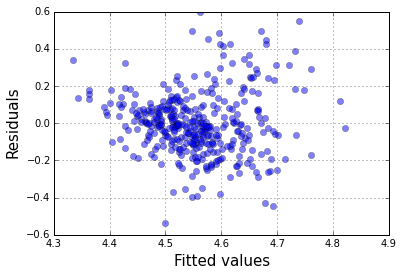

In [23]:
plt.grid(True)
plt.plot(result1.fittedvalues, result1.resid, 'o', alpha=0.5)
plt.xlabel("Fitted values", size=15)
plt.ylabel("Residuals", size=15)

__Plots of the fitted conditional mean function__



It's often useful to plot the fitted relationship between variables in a regression model.  To do this in a multiple regression, we usually hold all but one of the covariates (independent variables) fixed at a particular value, often at the mean value.  Here is how to make such a plot with the multiple regression model fit above.  We hold the population growth rate and real cost of borrowing fixed at their mean values and display the fitted log housing price index in terms of log household income.

/projects/3a549bb7-8b7c-41a0-83e7-b37fd3da53a0/statsmodels-master/statsmodels/sandbox/predict_functional.py:169: UserWarning: 'year', 'msa_cd' in data frame but not in summaries or values.
  % ", ".join(["'%s'" % x for x in unmatched]))


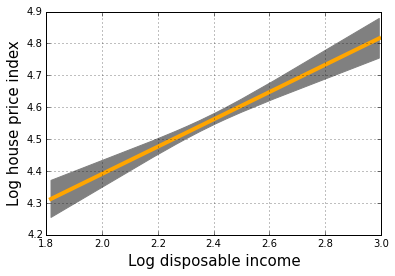

In [24]:
pr, cb, xv = predict_functional(result1, 'lpci_real', summaries={'pgr' : np.mean, 'rcb' : np.mean})

plt.clf()
plt.grid(True)
plt.plot(xv, pr, '-', color='orange', lw=4)
plt.fill_between(xv, cb[:, 0], cb[:, 1], color='grey')
plt.xlabel("Log disposable income", size=15)
plt.ylabel("Log house price index", size=15)

To see how two predictors work together in the regression model, we can plot one of them along the horizontal axis, and plot different lines for different fixed values of the other covariate.  We do this below with the population growth rate and disposable income variables.

/projects/3a549bb7-8b7c-41a0-83e7-b37fd3da53a0/statsmodels-master/statsmodels/sandbox/predict_functional.py:169: UserWarning: 'year', 'msa_cd' in data frame but not in summaries or values.
  % ", ".join(["'%s'" % x for x in unmatched]))


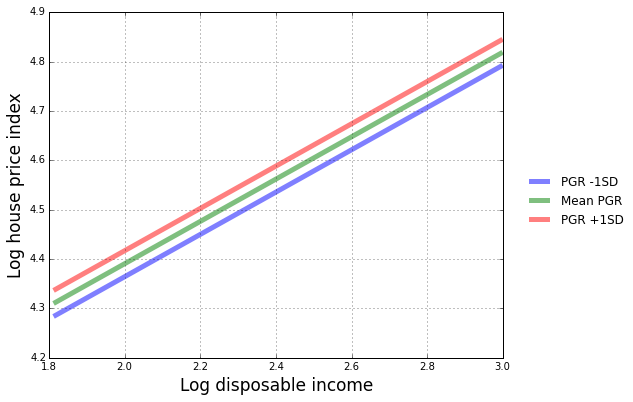

In [25]:
yp = []
for k in range(3):
    values = {}
    values["pgr"] = data_1990.pgr.mean() + (k-1) * data_1990.pgr.std()
    values["rcb"] = data_1990.rcb.mean()
    tup = predict_functional(result1, 'lpci_real', values=values)
    yp.append(tup)
    
plt.figure(figsize=(9, 6))
plt.clf()
ax = plt.axes([0.1, 0.1, 0.7, 0.8])
plt.grid(True)
for k in range(3):
    label = ["PGR -1SD", "Mean PGR", "PGR +1SD"][k]
    plt.plot(yp[k][2], yp[k][0], '-', lw=5, alpha=0.5, label=label)
ha, lb = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(ha, lb, "center right")
leg.draw_frame(False)
plt.xlabel("Log disposable income", size=17)
plt.ylabel("Log house price index", size=17)

__Models with interactions__

The graph above forces the relationship between the house price index and disposable income to have the same slope for each fixed level of the population growth rate.  However this may not be the case in reality.  We can specify a more flexible model by introducing an interaction between these covariates.  In most cases, it is a good idea to center variables before using them in an interaction.  This is easily accomplished using the `center` function in the regression formula.

In [26]:
model2 = sm.OLS.from_formula("lhpi_real ~ lpci_real + pgr + rcb + center(lpci_real):center(pgr)", data_1990)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:              lhpi_real   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     24.25
Date:                Thu, 11 Jun 2015   Prob (F-statistic):           7.27e-18
Time:                        13:26:09   Log-Likelihood:                 143.92
No. Observations:                 381   AIC:                            -277.8
Df Residuals:                     376   BIC:                            -258.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------------
Intercept     

Since the interaction term is much bigger than its standard error, there does appear to be an interaction here.  We can get a better sense of what is going on by plotting, using similar code as we developed above.

/projects/3a549bb7-8b7c-41a0-83e7-b37fd3da53a0/statsmodels-master/statsmodels/sandbox/predict_functional.py:169: UserWarning: 'year', 'msa_cd' in data frame but not in summaries or values.
  % ", ".join(["'%s'" % x for x in unmatched]))


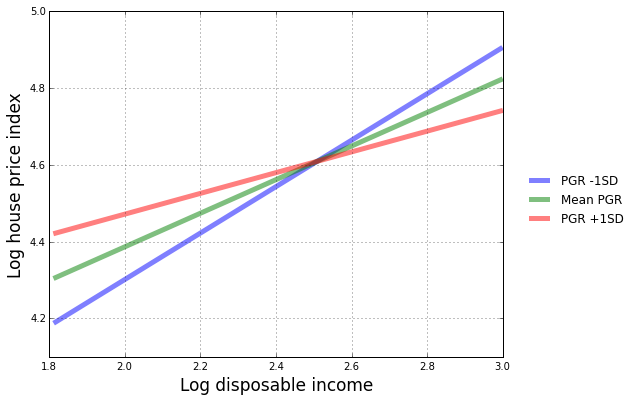

In [27]:
yp = []
for k in range(3):
    values = {}
    values["pgr"] = data_1990.pgr.mean() + (k-1) * data_1990.pgr.std()
    values["rcb"] = data_1990.rcb.mean()
    tup = predict_functional(result2, 'lpci_real', values=values)
    yp.append(tup)
    
plt.figure(figsize=(9, 6))
plt.clf()
ax = plt.axes([0.1, 0.1, 0.7, 0.8])
plt.grid(True)
for k in range(3):
    label = ["PGR -1SD", "Mean PGR", "PGR +1SD"][k]
    plt.plot(yp[k][2], yp[k][0], '-', lw=5, alpha=0.5, label=label)
ha, lb = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(ha, lb, "center right")
leg.draw_frame(False)
plt.xlabel("Log disposable income", size=17)
plt.ylabel("Log house price index", size=17)

The plot indicates that for poorer MSAs, there is a strong association between population growth rate and house prices.  This relationship dissappears for more affluent MSAs.

__Spline regression__

We saw above that the conditional mean relationship between log disposable income and log house prices appears not to be linear.  One way to address this in a multiple regression analysis is to use basis splines.

In [28]:
model3 = sm.OLS.from_formula("lhpi_real ~ bs(lpci_real, df=4) + bs(pgr, df=4) + rcb", data_1990)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:              lhpi_real   R-squared:                       0.248
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     13.61
Date:                Thu, 11 Jun 2015   Prob (F-statistic):           6.44e-19
Time:                        13:26:10   Log-Likelihood:                 154.57
No. Observations:                 381   AIC:                            -289.1
Df Residuals:                     371   BIC:                            -249.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                  4

Now that we have fit a more flexible mean structure model, we can look again at the fitted values on residuals plot.  There is no longer much evidence of heteroscedasticity.

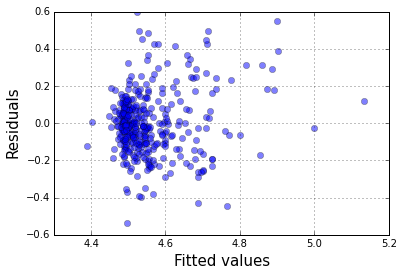

In [29]:
plt.grid(True)
plt.plot(result3.fittedvalues, result1.resid, 'o', alpha=0.5)
plt.xlabel("Fitted values", size=15)
plt.ylabel("Residuals", size=15)

The following plot shows the fitted relationship between log disposable income and the log housing price index, while controlling for population growth rate (at its mean value) and the real cost of borrowing.   

/projects/3a549bb7-8b7c-41a0-83e7-b37fd3da53a0/statsmodels-master/statsmodels/sandbox/predict_functional.py:169: UserWarning: 'year', 'msa_cd' in data frame but not in summaries or values.
  % ", ".join(["'%s'" % x for x in unmatched]))


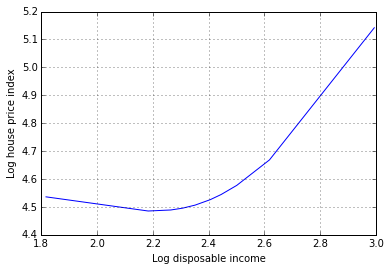

In [30]:
pr, cb, xv = predict_functional(result3, 'lpci_real', summaries={'pgr' : np.mean, 'rcb' : np.mean})

plt.clf()
plt.grid(True)
plt.plot(xv, pr, '-')
plt.xlabel("Log disposable income")
plt.ylabel("Log house price index")

Here is the same plot, but showing the association between population growth rate and housing prices, while controlling for disposable income (held fixed at its mean value).

/projects/3a549bb7-8b7c-41a0-83e7-b37fd3da53a0/statsmodels-master/statsmodels/sandbox/predict_functional.py:169: UserWarning: 'year', 'msa_cd' in data frame but not in summaries or values.
  % ", ".join(["'%s'" % x for x in unmatched]))


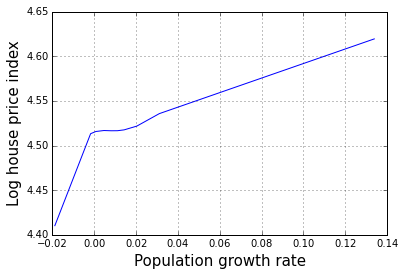

In [31]:
pr, cb, xv = predict_functional(result3, 'pgr', summaries={'lpci_real' : np.mean, 'rcb' : np.mean})

plt.clf()
plt.grid(True)
plt.plot(xv, pr, '-')
plt.xlabel("Population growth rate", size=15)
plt.ylabel("Log house price index", size=15)

To aid in interpreting this plot, we can also look at the distribution of the population growth rate values over the MSAs.

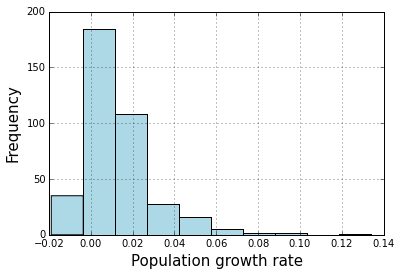

In [32]:
plt.hist(data_1990.pgr.values, color='lightblue')
plt.grid(True)
plt.xlabel("Population growth rate", size=15)
plt.ylabel("Frequency", size=15)

According to this analysis, faster population growth is associated with higher housing prices, but this trend is accelerated when the population growth rate is negative.

Spline regression woks by creating basis functions that are piecewise polynomials.  It's not important to understand the details of how this works.  The basic idea is that each basis spline will consist of a "bump", with peak value located somewhere in the domain of the original covariate.  To better understand this, we can plot the spline basis functions used above for the `pgr` variable.

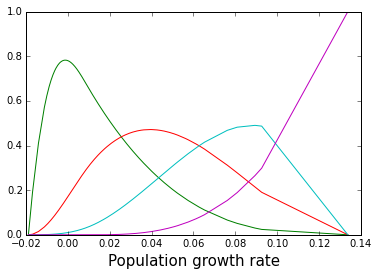

In [33]:
import patsy

dmat = patsy.dmatrix("bs(pgr, df=4)", data_1990, return_type='dataframe')
dmat = np.asarray(dmat)

ii = np.argsort(data_1990.pgr)
x = data_1990.loc[:, "pgr"].iloc[ii]

plt.clf()
for k in range(dmat.shape[1]):
    plt.plot(x, dmat[ii, k])
plt.xlabel("Population growth rate", size=15)

The `df` keyword argument controls the number of basis splines that are created.  The more basis splines that are used, the more flexible the overall fit.  You can rerun the above code after changing df to 8 to see how this works.

A remaining issue is how to select the `df` parameter for a "final" model.  One way to do this is using the AIC.  Lower AIC values indicate a better fit.  The cubic spline basis required `df` to be at least 3.  To create even simpler models for comparison, we use the original "main effects only" model as the `df=1` model, and the quadratic polynomial regression model as the `df=2` model.  According to the AIC, the best fit is with the quadratic polynomial regression model, but the `df=3` spline model is close.

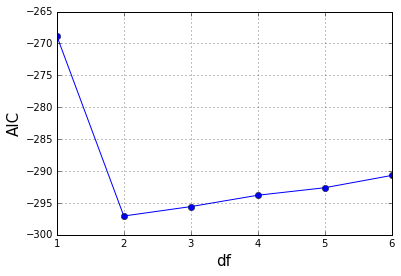

In [34]:
aic = []

model4 = sm.OLS.from_formula("lhpi_real ~ lpci_real + pgr + rcb", data_1990)
result4 = model4.fit()
aic.append([1, result4.aic])

model5 = sm.OLS.from_formula("lhpi_real ~ lpci_real + I(lpci_real**2) + pgr + rcb", data_1990)
result5 = model5.fit()
aic.append([2, result5.aic])

for df in range(3, 7):
    model = sm.OLS.from_formula("lhpi_real ~ bs(lpci_real, df=%s) + pgr + rcb" % df, data_1990)
    result = model.fit()
    aic.append([df, result.aic])
    
aic = np.asarray(aic)
plt.plot(aic[:, 0], aic[:, 1], '-o')
plt.grid(True)
plt.xlabel("df", size=15)
plt.ylabel("AIC", size=15)

__Spline model with interactions__

Above we fit a spline model, and a model with interactions between main effects.  We can combine these two ideas by fitting a spline model with interactions.  We use `df=3` here because that is the value of `df` preferred by the AIC for `lpci_real`.  A more thorough analysis would consider AIC values for different `df` settings for `pgr`.

In [35]:
model6 = sm.OLS.from_formula("lhpi_real ~ bs(lpci_real, df=3)*bs(pgr, df=3)", data_1990)
result6 = model6.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:              lhpi_real   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     27.91
Date:                Thu, 11 Jun 2015   Prob (F-statistic):           2.55e-16
Time:                        13:26:15   Log-Likelihood:                 138.41
No. Observations:                 381   AIC:                            -268.8
Df Residuals:                     377   BIC:                            -253.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      3.5073      0.118     29.614      0.0

Note that the AIC value is similar to the best obtained above, for models without interactions.  Thus the interaction may not be real, but we can plot it to see what it looks like.

/projects/3a549bb7-8b7c-41a0-83e7-b37fd3da53a0/statsmodels-master/statsmodels/sandbox/predict_functional.py:169: UserWarning: 'year', 'msa_cd' in data frame but not in summaries or values.
  % ", ".join(["'%s'" % x for x in unmatched]))


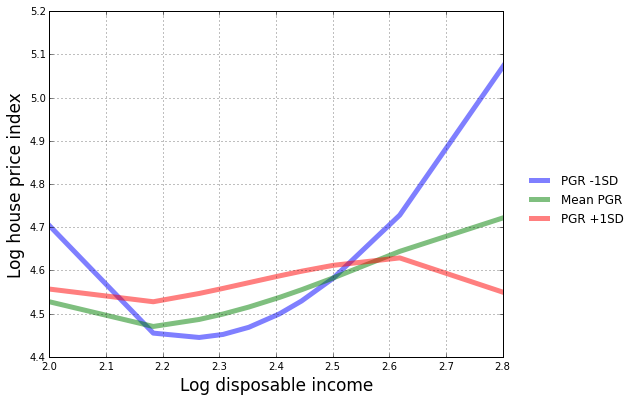

In [36]:
yp = []
for k in range(3):
    values = {}
    values["pgr"] = data_1990.pgr.mean() + (k-1) * data_1990.pgr.std()
    values["rcb"] = data_1990.rcb.mean()
    tup = predict_functional(result6, 'lpci_real', values=values)
    yp.append(tup)
    
plt.figure(figsize=(9, 6))
plt.clf()
ax = plt.axes([0.1, 0.1, 0.7, 0.8])
plt.grid(True)
for k in range(3):
    label = ["PGR -1SD", "Mean PGR", "PGR +1SD"][k]
    plt.plot(yp[k][2], yp[k][0], '-', lw=5, alpha=0.5, label=label)
ha, lb = plt.gca().get_legend_handles_labels()
leg = plt.figlegend(ha, lb, "center right")
leg.draw_frame(False)
plt.xlim(2, 2.8)
plt.ylim(4.4, 5.2)
plt.xlabel("Log disposable income", size=17)
plt.ylabel("Log house price index", size=17)